In [1]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [91]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_cleaned = pd.read_csv(os.path.join(ROOT_DIR, "train_cleaned.csv"))
train_cleaned

Equipment_Dam Model.Suffix  CURE END POSITION X Collect Result_Dam  \
0      Dam dispenser #1  AJX75334505                                   240.0   
1      Dam dispenser #2  AJX75334501                                  1000.0   
2      Dam dispenser #1  AJX75334501                                   240.0   
3      Dam dispenser #2  AJX75334501                                  1000.0   
4      Dam dispenser #2  AJX75334501                                  1000.0   
...                 ...          ...                                     ...   
40501  Dam dispenser #1  AJX75334501                                   240.0   
40502  Dam dispenser #1  AJX75334501                                   240.0   
40503  Dam dispenser #1  AJX75334501                                   240.0   
40504  Dam dispenser #2  AJX75334501                                  1000.0   
40505  Dam dispenser #1  AJX75334501                                   240.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         2.5                            100   
1                                        12.5                             85   
2                                         2.5                             70   
3                                        12.5                             70   
4                                        12.5                             85   
...                                       ...                            ...   
40501                                     2.5                             70   
40502                                     2.5                             70   
40503                                     2.5                             70   
40504                                    12.5                             70   
40505                                     2.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
40501                                      1030   
40502                                      1030   
40503                                      1030   
40504                                       280   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
40501                                       -90   
40502                                       -90   
40503                                       -90   
40504                                        90   
40505                                       -90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                16   
2                                                16   
3                                                16   
4                                                16   
...                                             ...   
40501                                            10   
40502                                            10   
40503                                            10   
40504                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   14.7     
2              

In [56]:
# equip2 인 행만 추출
equip2 = train_cleaned[
    (train_cleaned['Equipment_Dam'] == 'Dam dispenser #2') &
    (train_cleaned['Equipment_Fill1'] == 'Fill1 dispenser #2') &
    (train_cleaned['Equipment_Fill2'] == 'Fill2 dispenser #2')
]

# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: equip2[col].iloc[0] for col in equip2.columns if equip2[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
equip2 = equip2.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

# equip2.to_csv('./data/equip2.csv', index=False)

equip2

삭제된 열의 개수: 11
삭제된 열과 값:
Equipment_Dam: Dam dispenser #2
CURE END POSITION X Collect Result_Dam: 1000.0
CURE END POSITION Z Collect Result_Dam: 12.5
CURE START POSITION X Collect Result_Dam: 280
CURE START POSITION Θ Collect Result_Dam: 90
Equipment_Fill1: Fill1 dispenser #2
Equipment_Fill2: Fill2 dispenser #2
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2: 499.8
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2: 1324.2
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2: 1324.2
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2: 243.5


Model.Suffix  CURE SPEED Collect Result_Dam  \
1      AJX75334501                             85   
3      AJX75334501                             70   
4      AJX75334501                             85   
5      AJX75334501                             70   
6      AJX75334501                             70   
...            ...                            ...   
40491  AJX75334501                             70   
40493  AJX75334502                             70   
40496  AJX75334501                             70   
40498  AJX75334501                             70   
40504  AJX75334501                             70   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
1                                                16   
3                                                16   
4                                                16   
5                                                16   
6                                                10   
...                                             ...   
40491                                            10   
40493                                            10   
40496                                            10   
40498                                            10   
40504                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
1                                                   14.7     
3                                                   13.2     
4                                                   14.7     
5                                                   13.2     
6                                                   21.3     
...                                                  ...     
40491                                               17.0     
40493                                               21.3     
40496                                                9.7     
40498                                               21.3     
40504                                                9.7     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
1                                                    8.5     
3                                                    7.6     
4                                                    8.5     
5                                                    8.2     
6                                                   10.5     
...                                                  ...     
40491                                                4.9     
40493                                                8.4     
40496                                                4.9     
40498                                                8.4     
40504                                                4.9     

       DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
1                                                   14.7     
3                                                   13.2     
4                                                   14.7     
5                                                   13.2     
6                                                   21.3     
...                                                  ...     
40491                                               17.0     
40493                                               21.3     
40496                                                9.7     
40498                                               21.3     
40504                                                9.7     

       Dispense Volume(Stage1) Collect Result_Dam  \
1                                            1.61   
3                                            0.92   
4                                            1.02   
5                                            0.92   
6                                            1.49   
...                                           ...   
40491                                        1.19   
40493                                        1.49

In [92]:
# equip1 인 행만 추출
equip1 = train_cleaned[
    (train_cleaned['Equipment_Dam'] == 'Dam dispenser #1') &
    (train_cleaned['Equipment_Fill1'] == 'Fill1 dispenser #1') &
    (train_cleaned['Equipment_Fill2'] == 'Fill2 dispenser #1')
]

# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: equip1[col].iloc[0] for col in equip1.columns if equip1[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
equip1 = equip1.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

# equip1.to_csv('./data/equip1.csv', index=False)

equip1

삭제된 열의 개수: 13
삭제된 열과 값:
Equipment_Dam: Dam dispenser #1
CURE END POSITION X Collect Result_Dam: 240.0
CURE END POSITION Z Collect Result_Dam: 2.5
CURE START POSITION X Collect Result_Dam: 1030
CURE START POSITION Θ Collect Result_Dam: -90
Equipment_Fill1: Fill1 dispenser #1
Equipment_Fill2: Fill2 dispenser #1
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2: 835.5
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2: 458.0
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2: 156.0
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2: 428.0
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2: 427.9
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2: 243.7


Model.Suffix  CURE SPEED Collect Result_Dam  \
0      AJX75334505                            100   
2      AJX75334501                             70   
8      AJX75334502                             70   
9      AJX75334501                             70   
10     AJX75334501                             70   
...            ...                            ...   
40500  AJX75334501                             70   
40501  AJX75334501                             70   
40502  AJX75334501                             70   
40503  AJX75334501                             70   
40505  AJX75334501                             70   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
2                                                16   
8                                                16   
9                                                16   
10                                               16   
...                                             ...   
40500                                            10   
40501                                            10   
40502                                            10   
40503                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
2                                                   13.2     
8                                                   14.2     
9                                                   13.2     
10                                                  13.6     
...                                                  ...     
40500                                                9.6     
40501                                                9.7     
40502                                                9.7     
40503                                               17.0     
40505                                                9.6     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                    8.4     
2                                                    6.5     
8                                                    8.1     
9                                                    6.6     
10                                                   8.1     
...                                                  ...     
40500                                                4.9     
40501                                                4.9     
40502                                                4.9     
40503                                                5.0     
40505                                                3.9     

       DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                                   14.7     
2                                                   13.2     
8                                                   14.3     
9                                                   13.1     
10                                                  13.6     
...                                                  ...     
40500                                                9.7     
40501                                                9.7     
40502                                                9.6     
40503                                               17.0     
40505                                                9.7     

       Dispense Volume(Stage1) Collect Result_Dam  \
0                                            1.04   
2                                            0.92   
8                                            0.99   
9                                            1.45   
10                                           0.95   
...                                           ...   
40500                                        0.67   
40501                                        0.67

In [93]:
# 범주형 제거
columns_to_drop = [
    'Model.Suffix', 'Chamber Temp. Judge Value_AutoClave',

    'PalletID Collect Result_Dam', 'Receip No Collect Result_Dam',
    'PalletID Collect Result_Fill1', 'Receip No Collect Result_Fill1',
    'PalletID Collect Result_Fill2', 'Receip No Collect Result_Fill2'
]

# 열 삭제
equip2 = equip2.drop(columns=columns_to_drop)

# 결과 확인
equip2

CURE SPEED Collect Result_Dam  \
0                                 85   
1                                 70   
2                                 85   
3                                 70   
4                                 70   
...                              ...   
15456                             70   
15457                             70   
15458                             70   
15459                             70   
15460                             70   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                16   
2                                                16   
3                                                16   
4                                                10   
...                                             ...   
15456                                            10   
15457                                            10   
15458                                            10   
15459                                            10   
15460                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.7     
1                                                   13.2     
2                                                   14.7     
3                                                   13.2     
4                                                   21.3     
...                                                  ...     
15456                                               17.0     
15457                                               21.3     
15458                                                9.7     
15459                                               21.3     
15460                                                9.7     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                    8.5     
1                                                    7.6     
2                                                    8.5     
3                                                    8.2     
4                                                   10.5     
...                                                  ...     
15456                                                4.9     
15457                                                8.4     
15458                                                4.9     
15459                                                8.4     
15460                                                4.9     

       DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                                   14.7     
1                                                   13.2     
2                                                   14.7     
3                                                   13.2     
4                                                   21.3     
...                                                  ...     
15456                                               17.0     
15457                                               21.3     
15458                                                9.7     
15459                                               21.3     
15460                                                9.7     

       Dispense Volume(Stage1) Collect Result_Dam  \
0                                            1.61   
1                                            0.92   
2                                            1.02   
3                                            0.92   
4                                            1.49   
...                                           ...   
15456                                        1.19   
15457                                        1.49   
15458                                        0.67   
15459                                        1.49   
15460                                        0.

### Equip2_All

34


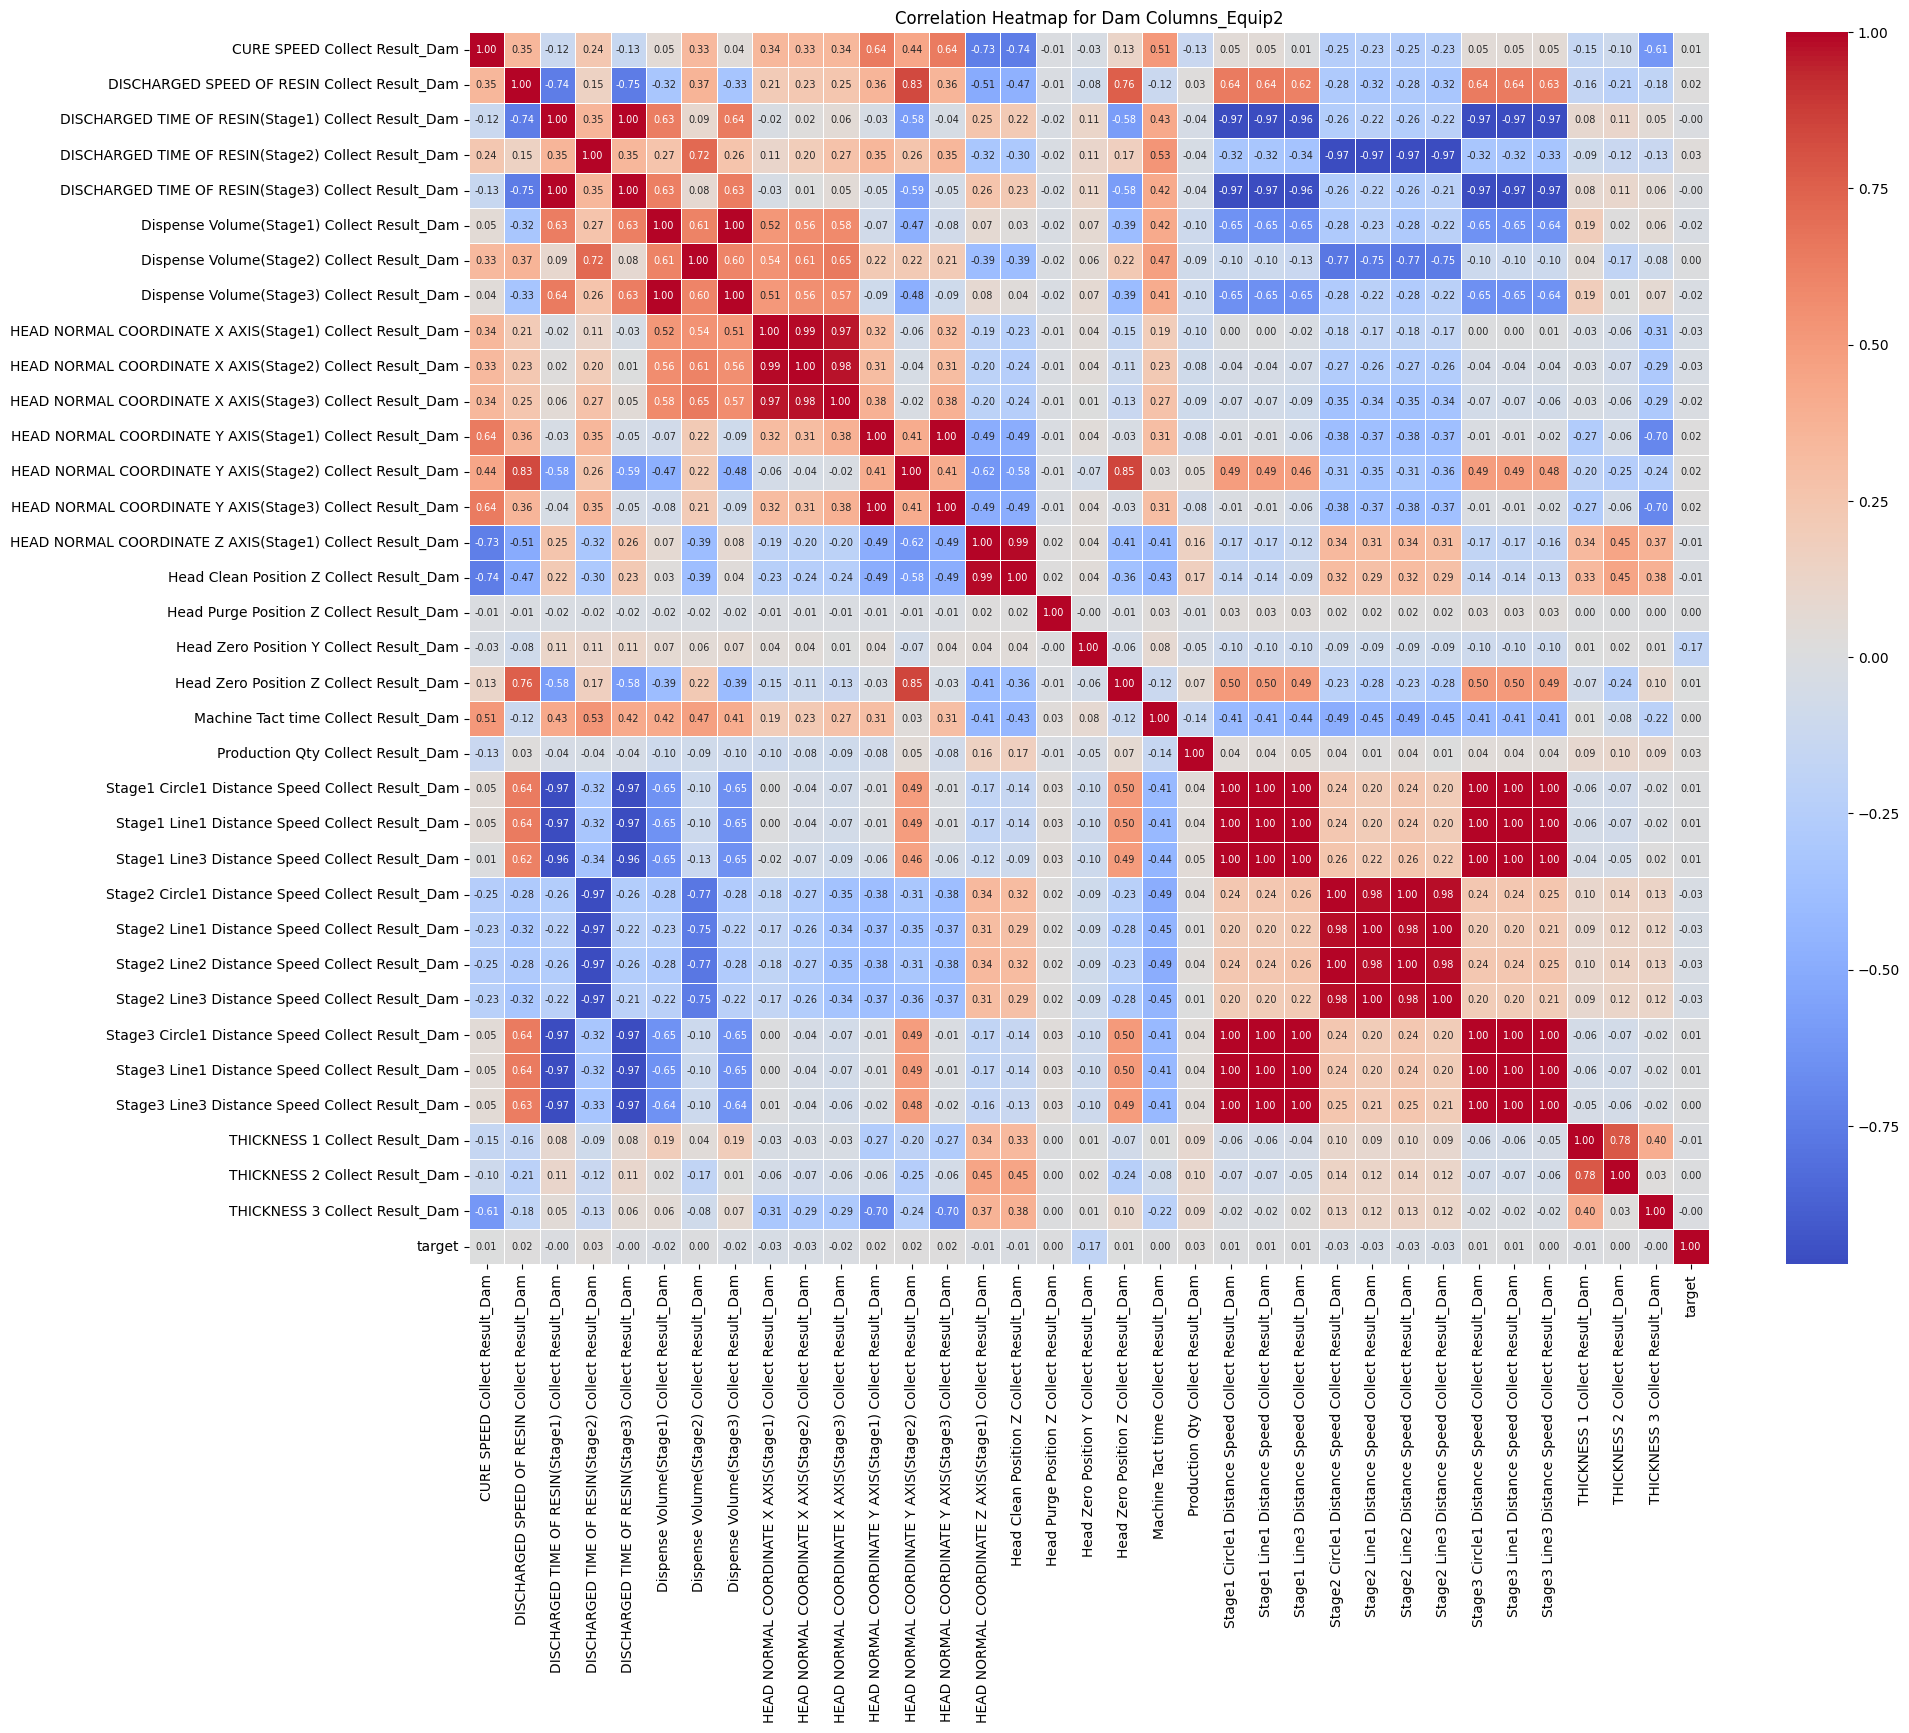

상위 5개의 상관관계:
Stage2 Line2 Distance Speed Collect Result_Dam            Stage2 Circle1 Distance Speed Collect Result_Dam            0.999985
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam  HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam    0.999971
Stage1 Circle1 Distance Speed Collect Result_Dam          Stage3 Circle1 Distance Speed Collect Result_Dam            0.999742
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         0.999553
Dispense Volume(Stage3) Collect Result_Dam                Dispense Volume(Stage1) Collect Result_Dam                  0.999530
dtype: float64


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dam이라는 이름이 포함된 열들만 필터링하고 복사본 생성
dam_columns = equip2.filter(like='Dam').copy()
print(len(dam_columns.columns))

# target 열을 1과 0으로 인코딩
dam_columns['target'] = equip2['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = dam_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Heatmap for Dam Columns_Equip2')
plt.show()

# 상관계수 상위 5개 추출
corr_unstacked = correlation_matrix.abs().unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked != 1]  # 자기 자신과의 상관관계 제외

top_5_corr = corr_unstacked.drop_duplicates().head(5)
print("상위 5개의 상관관계:")
print(top_5_corr)

19


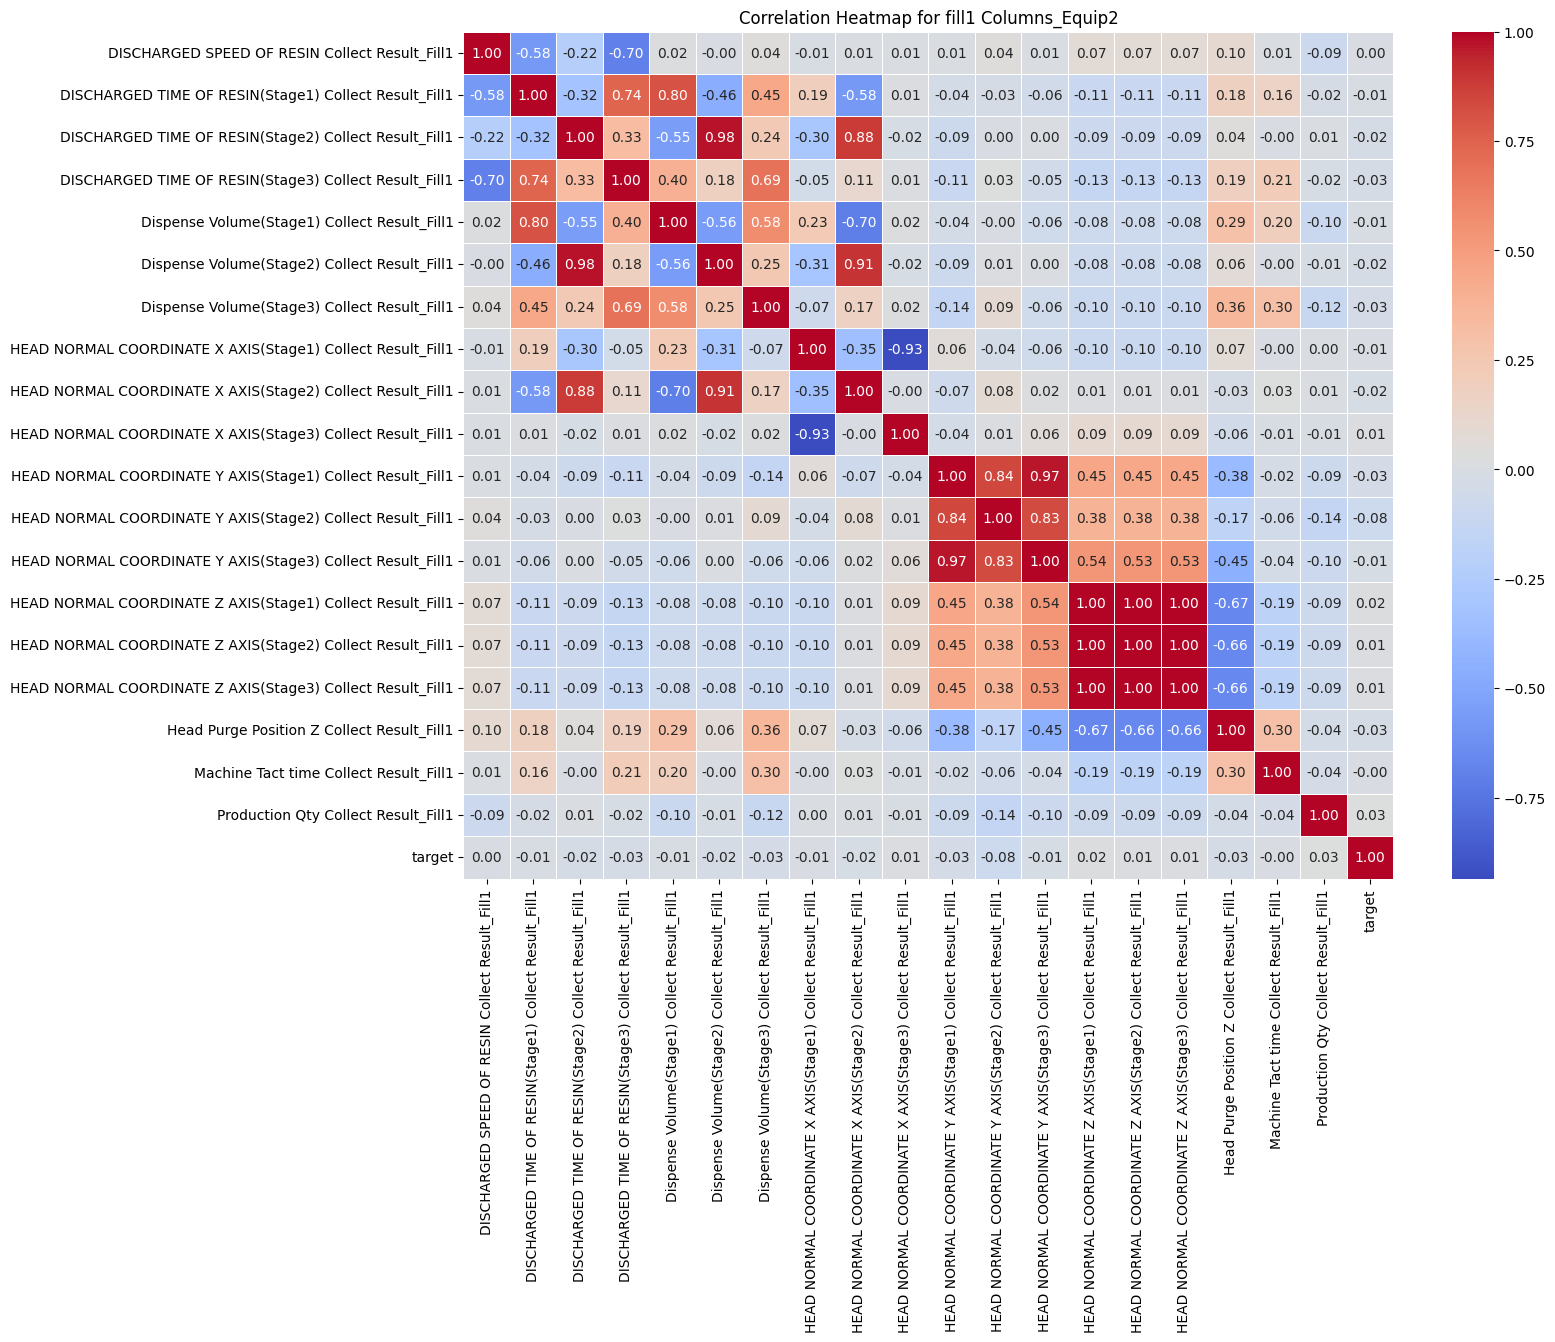

상위 5개의 상관관계:
HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1  HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1    0.997359
Dispense Volume(Stage2) Collect Result_Fill1                DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1         0.975776
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1  HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1    0.965810
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1  HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1    0.934961
Dispense Volume(Stage2) Collect Result_Fill1                HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1    0.907071
dtype: float64


In [95]:
fill1_columns = equip2.filter(like = 'Fill1').copy()
print(len(fill1_columns.columns))

# target 열을 1과 0으로 인코딩
fill1_columns['target'] = equip2['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = fill1_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for fill1 Columns_Equip2')
plt.show()

# 상관계수 상위 5개 추출
corr_unstacked = correlation_matrix.abs().unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked != 1]  # 자기 자신과의 상관관계 제외

top_5_corr = corr_unstacked.drop_duplicates().head(5)
print("상위 5개의 상관관계:")
print(top_5_corr)

10


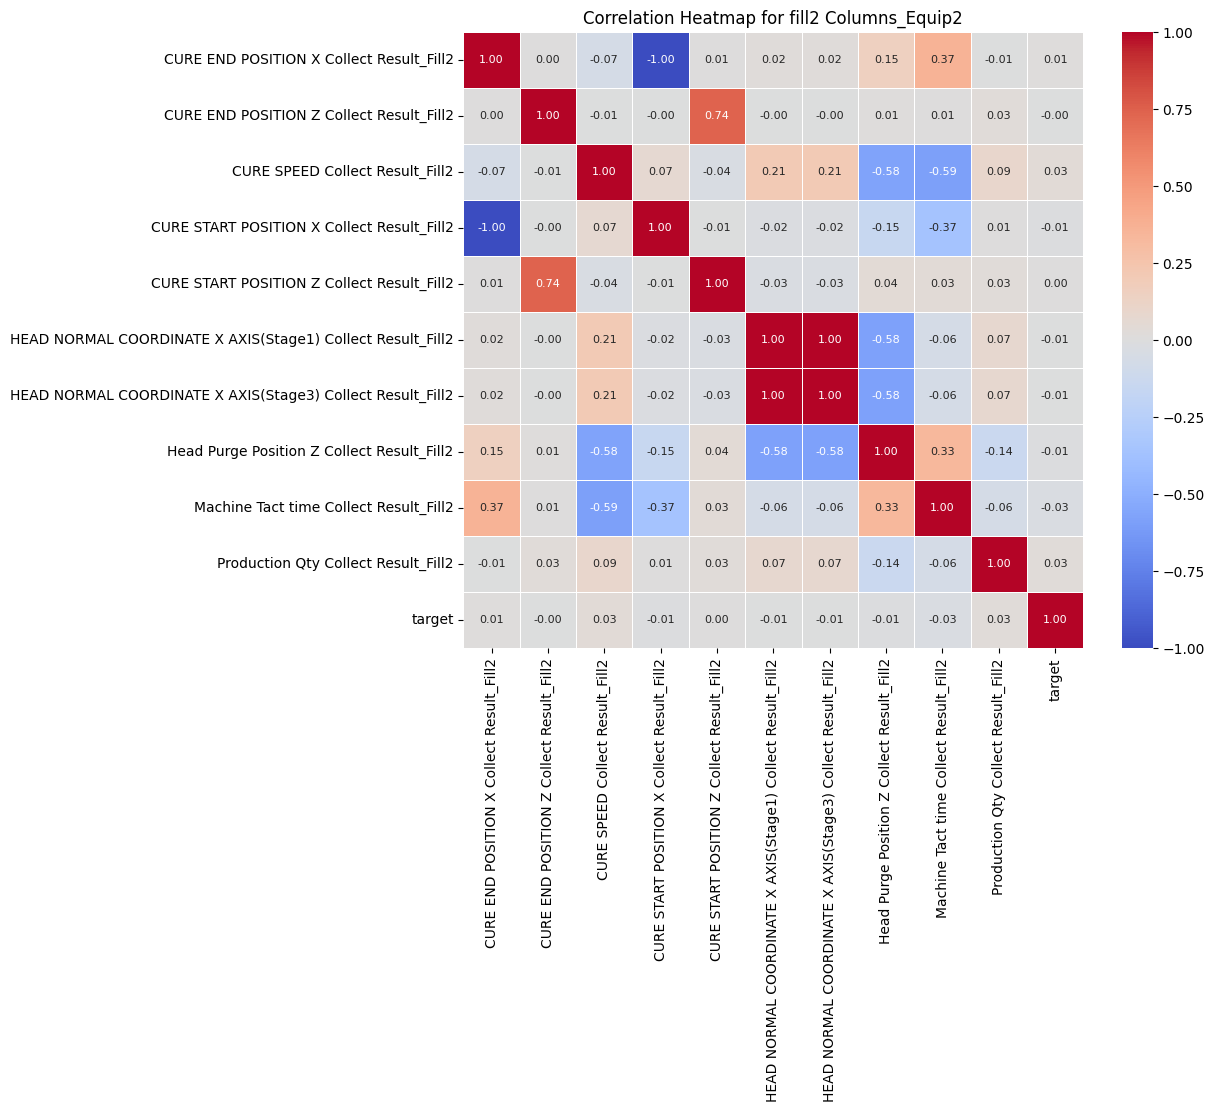

상위 5개의 상관관계:
CURE END POSITION X Collect Result_Fill2                    CURE START POSITION X Collect Result_Fill2                    1.000000
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2  HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    1.000000
CURE START POSITION Z Collect Result_Fill2                  CURE END POSITION Z Collect Result_Fill2                      0.737783
Machine Tact time Collect Result_Fill2                      CURE SPEED Collect Result_Fill2                               0.591723
Head Purge Position Z Collect Result_Fill2                  HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2    0.578546
dtype: float64


In [96]:
fill2_columns = equip2.filter(like = 'Fill2').copy()
print(len(fill2_columns.columns))

# target 열을 1과 0으로 인코딩
fill2_columns['target'] = equip2['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = fill2_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for fill2 Columns_Equip2')
plt.show()

# 상관계수 상위 5개 추출
corr_unstacked = correlation_matrix.abs().unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked != 1]  # 자기 자신과의 상관관계 제외

top_5_corr = corr_unstacked.drop_duplicates().head(5)
print("상위 5개의 상관관계:")
print(top_5_corr)

8


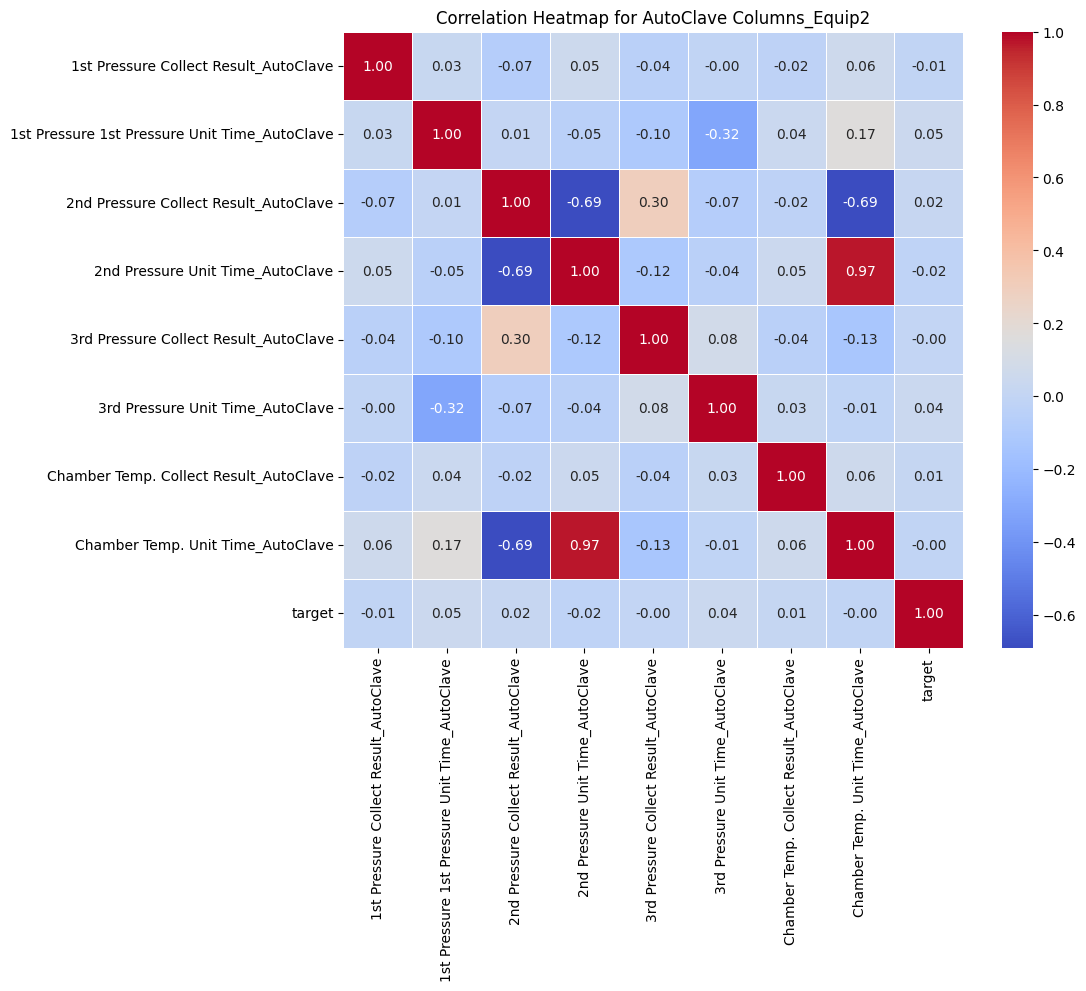

상위 5개의 상관관계:
Chamber Temp. Unit Time_AutoClave      2nd Pressure Unit Time_AutoClave                 0.971321
2nd Pressure Unit Time_AutoClave       2nd Pressure Collect Result_AutoClave            0.689517
Chamber Temp. Unit Time_AutoClave      2nd Pressure Collect Result_AutoClave            0.687225
3rd Pressure Unit Time_AutoClave       1st Pressure 1st Pressure Unit Time_AutoClave    0.317147
2nd Pressure Collect Result_AutoClave  3rd Pressure Collect Result_AutoClave            0.296368
dtype: float64


In [97]:
auto_columns = equip2.filter(like = 'AutoClave').copy()
print(len(auto_columns.columns))

# target 열을 1과 0으로 인코딩
auto_columns['target'] = equip2['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = auto_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for AutoClave Columns_Equip2')
plt.show()

# 상관계수 상위 5개 추출
corr_unstacked = correlation_matrix.abs().unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked != 1]  # 자기 자신과의 상관관계 제외

top_5_corr = corr_unstacked.drop_duplicates().head(5)
print("상위 5개의 상관관계:")
print(top_5_corr)

### Equip2_Normal

In [25]:
# target이 'normal'인 행만 필터링
equip2_normal = equip2[equip2['target'] == 'Normal']

# 필터링된 데이터프레임 크기 확인
print(f"'target'이 'normal'인 행의 개수: {len(equip2_normal)}")

equip2_normal

'target'이 'normal'인 행의 개수: 14611


CURE SPEED Collect Result_Dam  \
1                                 85   
3                                 70   
4                                 85   
5                                 70   
6                                 70   
...                              ...   
40490                             70   
40491                             70   
40496                             70   
40498                             70   
40504                             70   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
1                                                16   
3                                                16   
4                                                16   
5                                                16   
6                                                10   
...                                             ...   
40490                                            10   
40491                                            10   
40496                                            10   
40498                                            10   
40504                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
1                                                   14.7     
3                                                   13.2     
4                                                   14.7     
5                                                   13.2     
6                                                   21.3     
...                                                  ...     
40490                                               17.0     
40491                                               17.0     
40496                                                9.7     
40498                                               21.3     
40504                                                9.7     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
1                                                    8.5     
3                                                    7.6     
4                                                    8.5     
5                                                    8.2     
6                                                   10.5     
...                                                  ...     
40490                                                4.9     
40491                                                4.9     
40496                                                4.9     
40498                                                8.4     
40504                                                4.9     

       DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
1                                                   14.7     
3                                                   13.2     
4                                                   14.7     
5                                                   13.2     
6                                                   21.3     
...                                                  ...     
40490                                               17.0     
40491                                               17.0     
40496                                                9.7     
40498                                               21.3     
40504                                                9.7     

       Dispense Volume(Stage1) Collect Result_Dam  \
1                                            1.61   
3                                            0.92   
4                                            1.02   
5                                            0.92   
6                                            1.49   
...                                           ...   
40490                                        1.19   
40491                                        1.19   
40496                                        0.67   
40498                                        1.49   
40504                                        0.

34


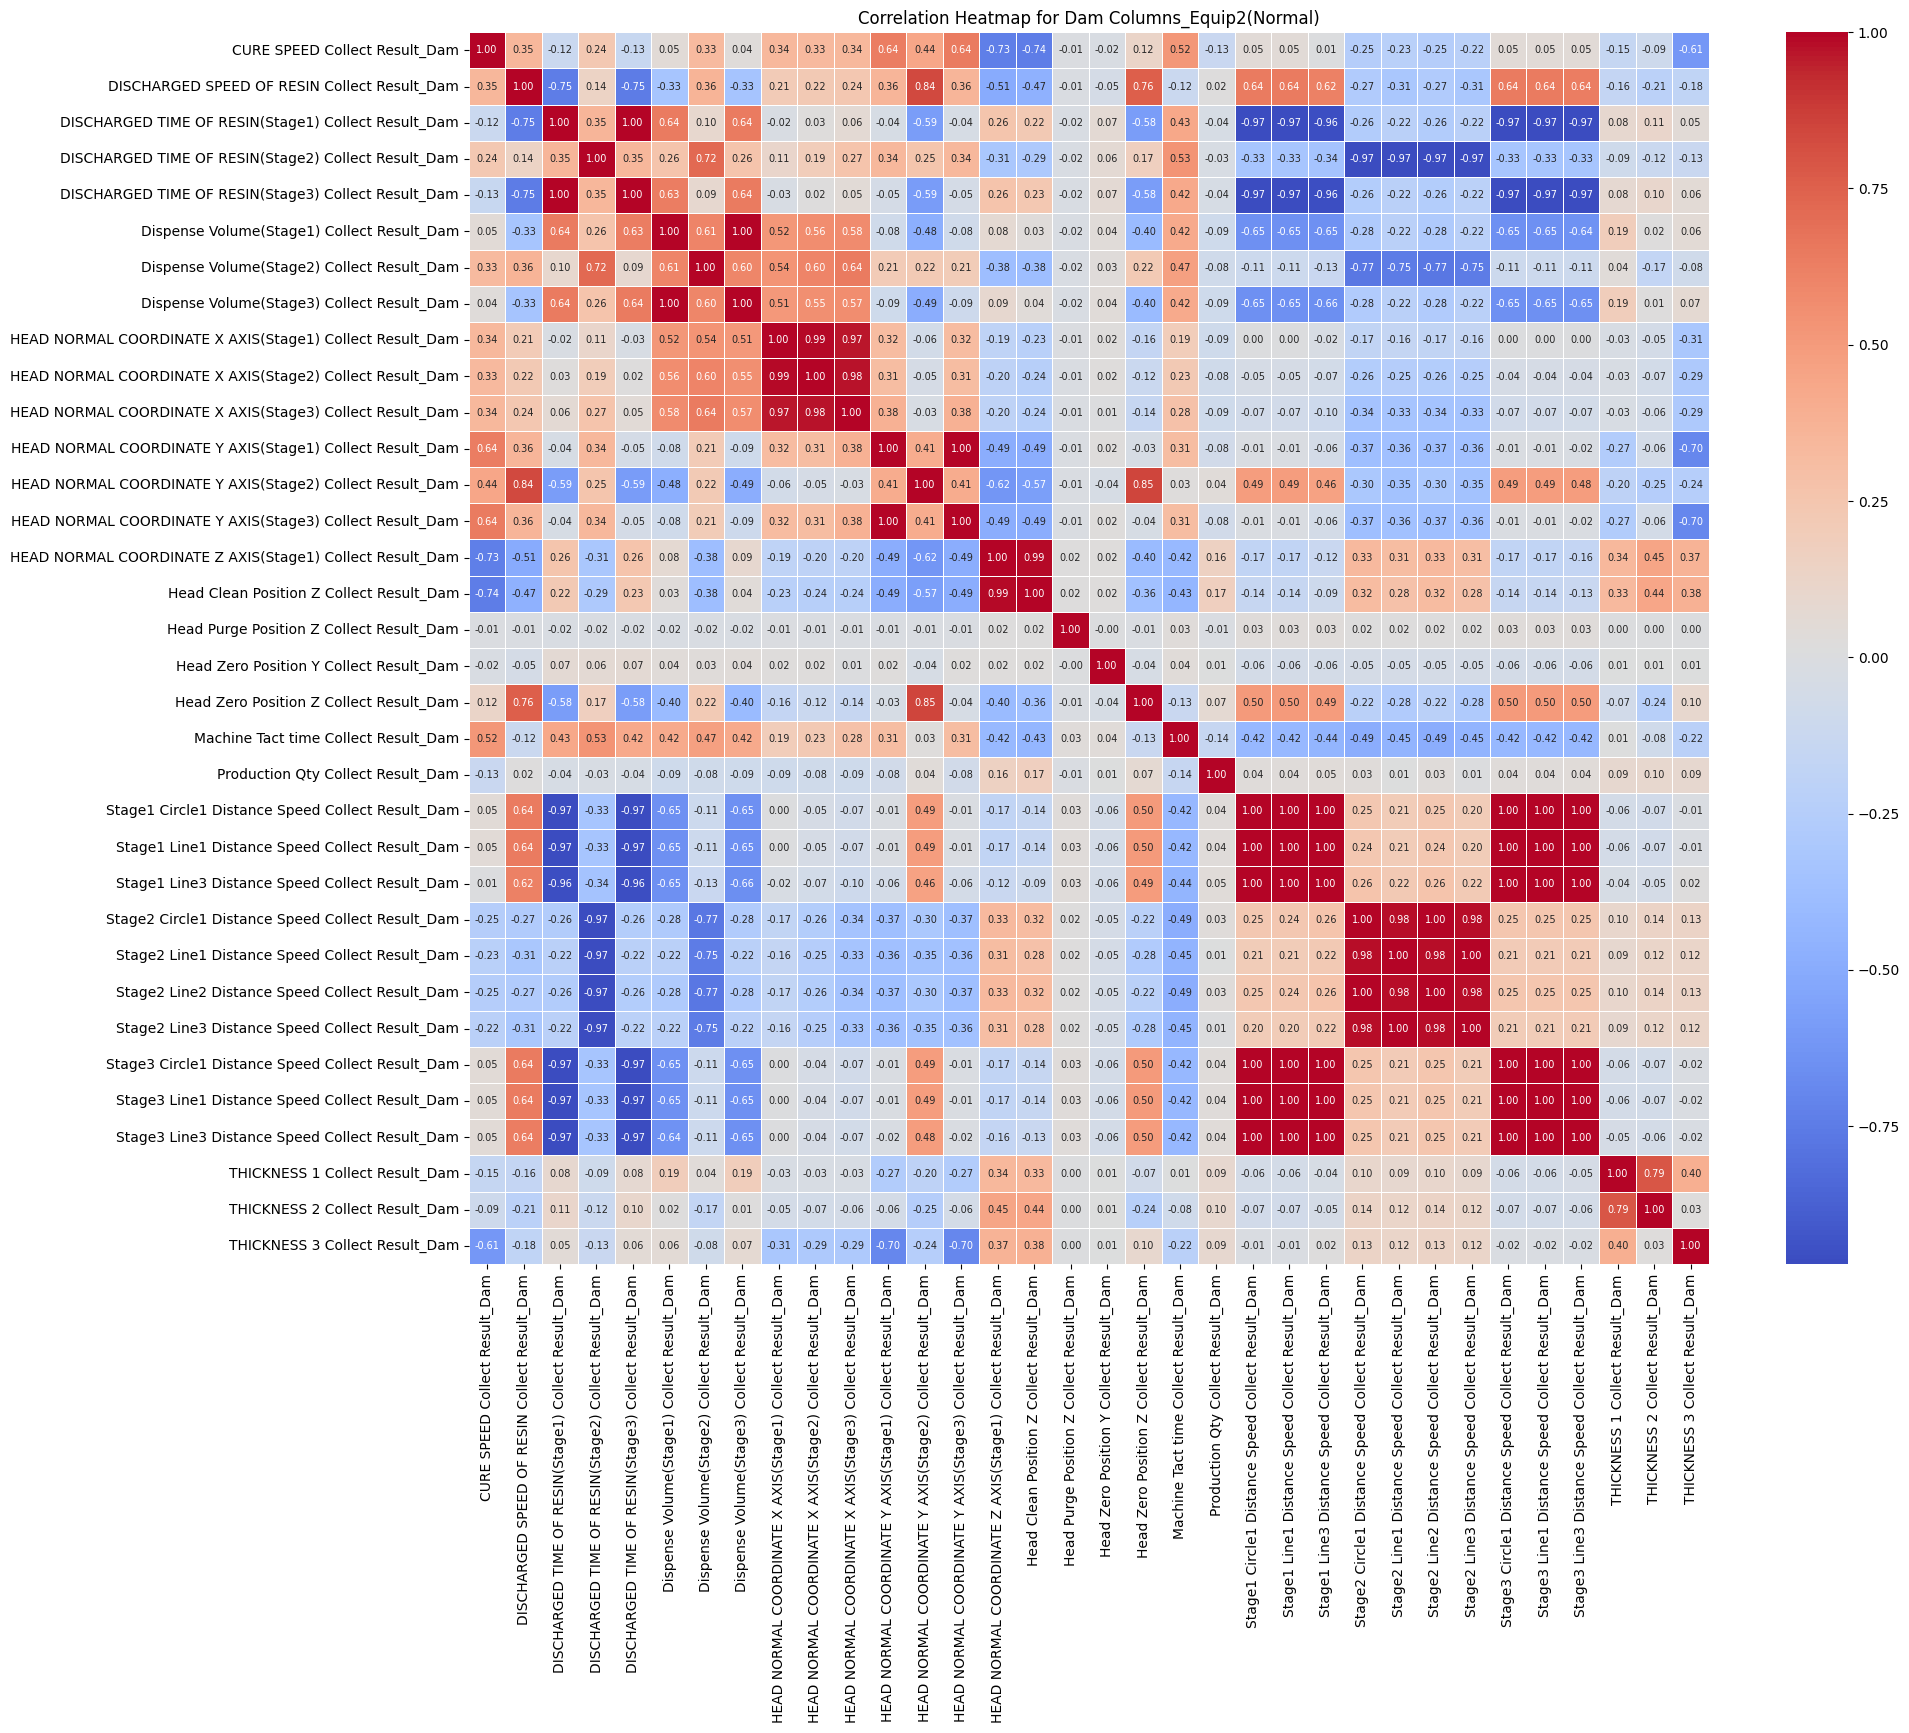

In [26]:
# Dam이라는 이름이 포함된 열들만 필터링하고 복사본 생성
dam_columns = equip2_normal.filter(like='Dam').copy()
print(len(dam_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = dam_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Heatmap for Dam Columns_Equip2(Normal)')
plt.show()

19


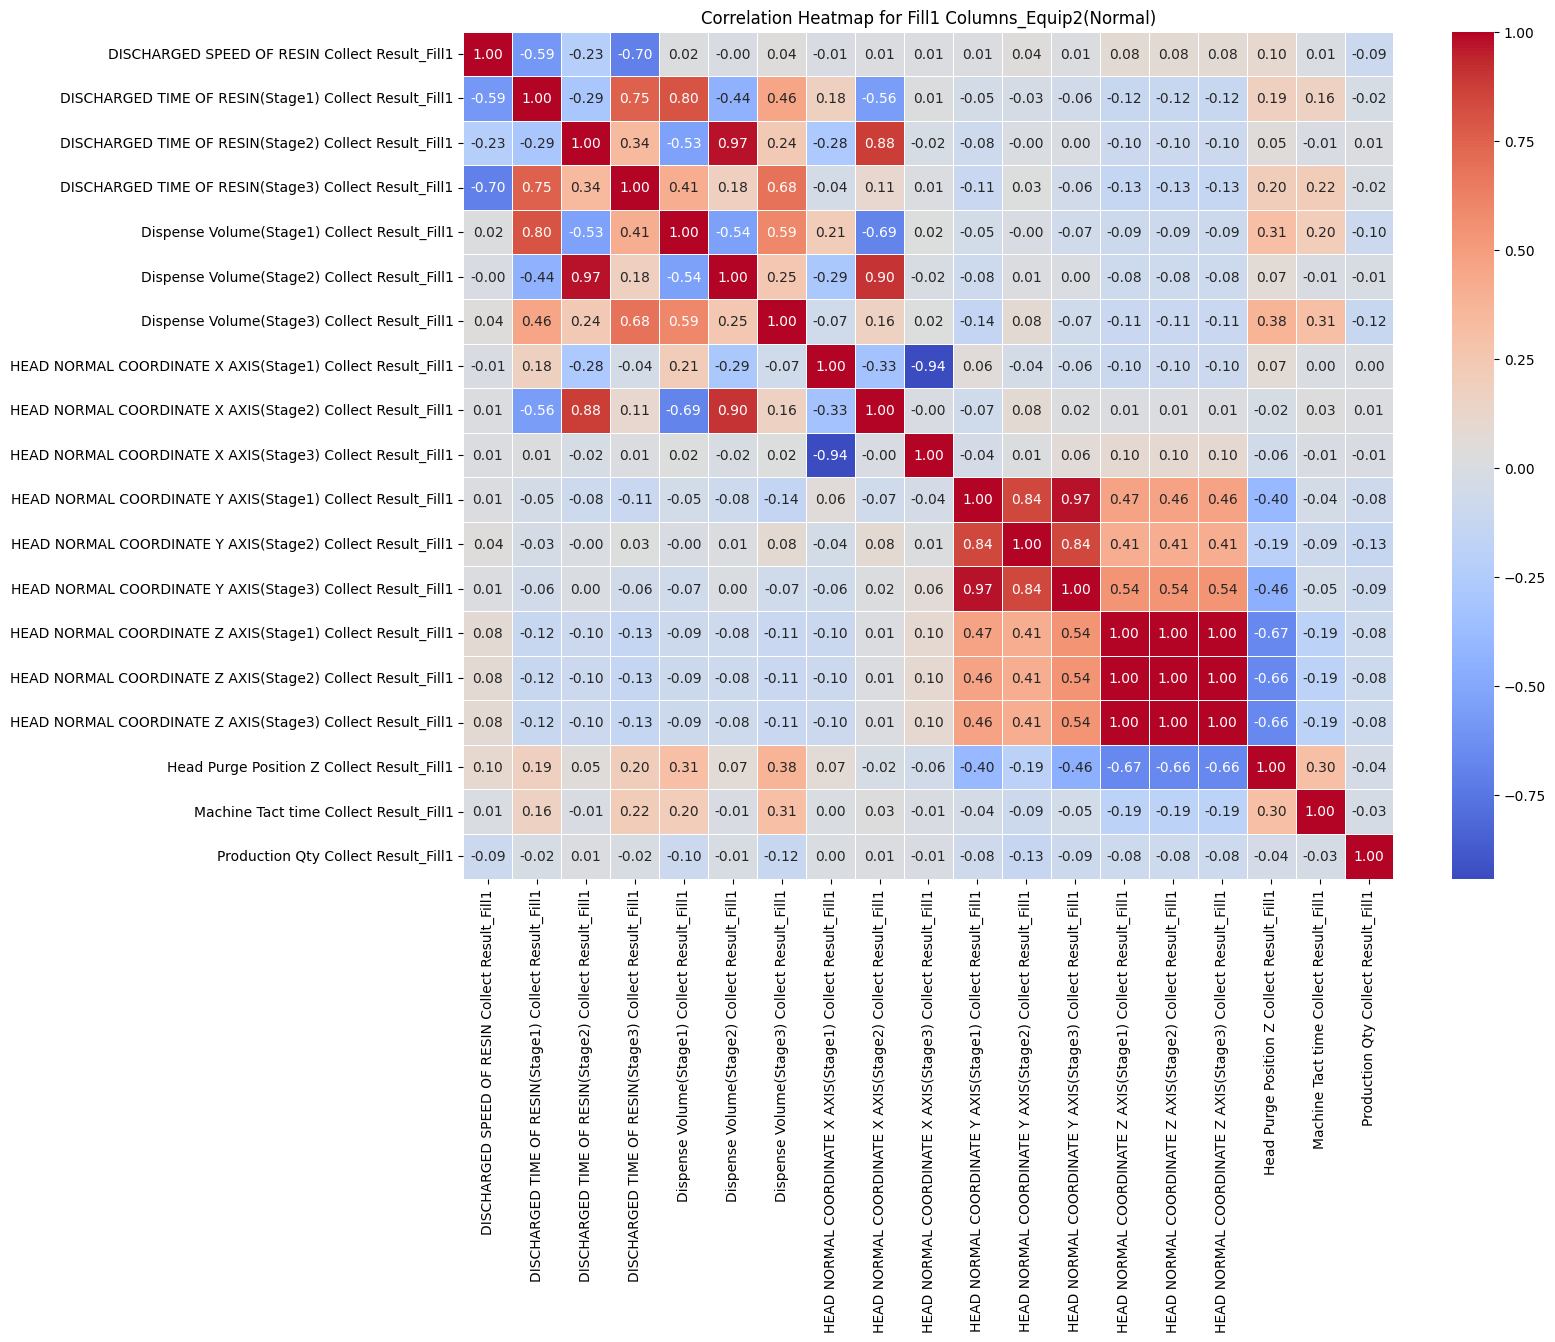

In [34]:
fill1_columns = equip2_normal.filter(like='Fill1').copy()
print(len(fill1_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill1_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for Fill1 Columns_Equip2(Normal)')
plt.show()

10


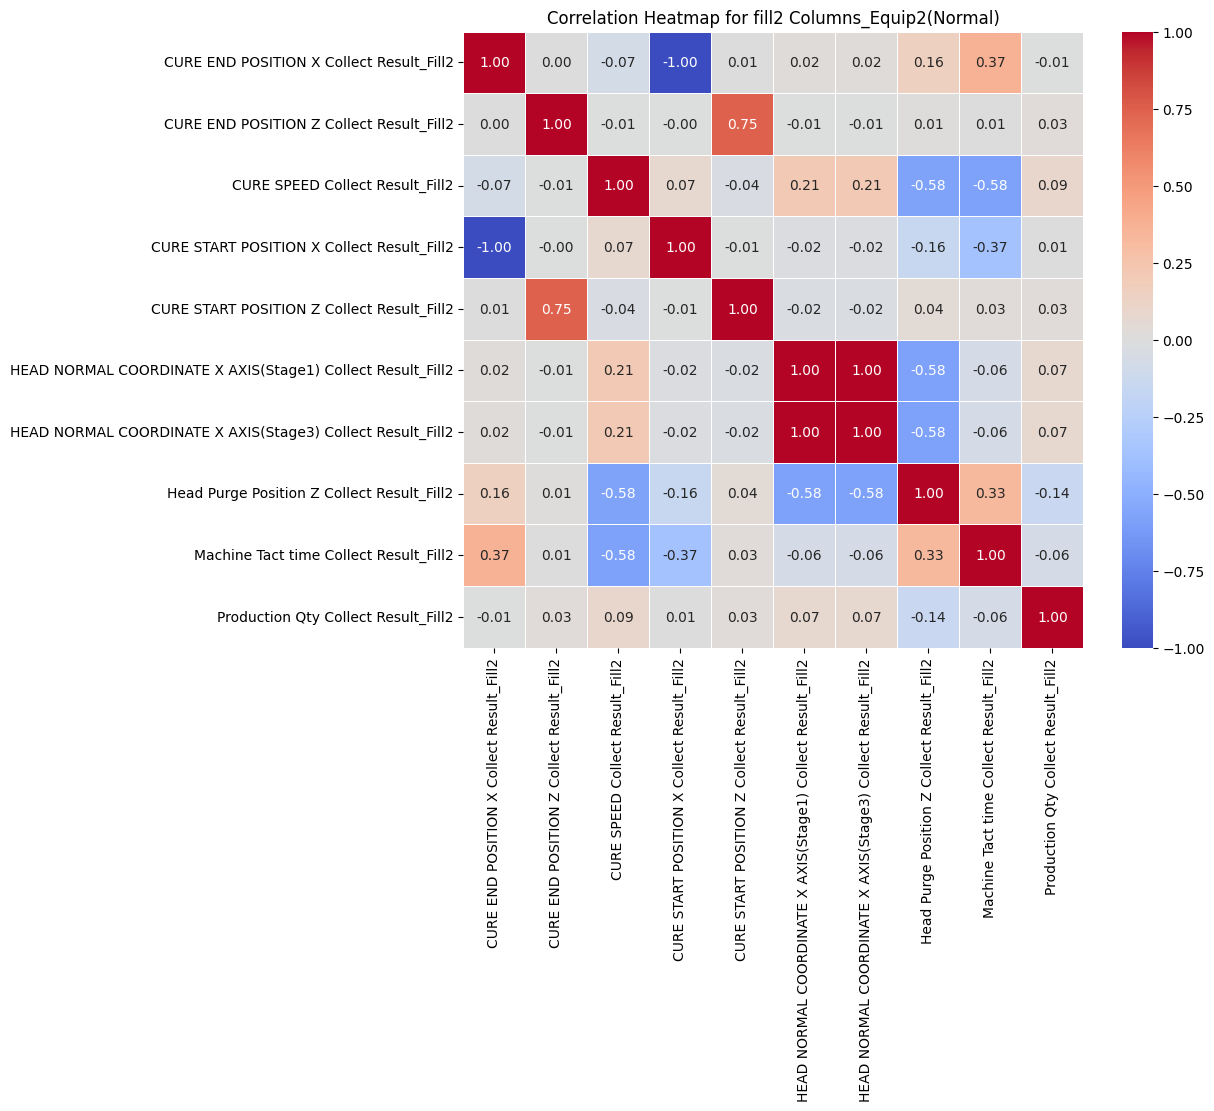

In [36]:
fill2_columns = equip2_normal.filter(like = 'Fill2').copy()
print(len(fill2_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill2_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for fill2 Columns_Equip2(Normal)')
plt.show()

8


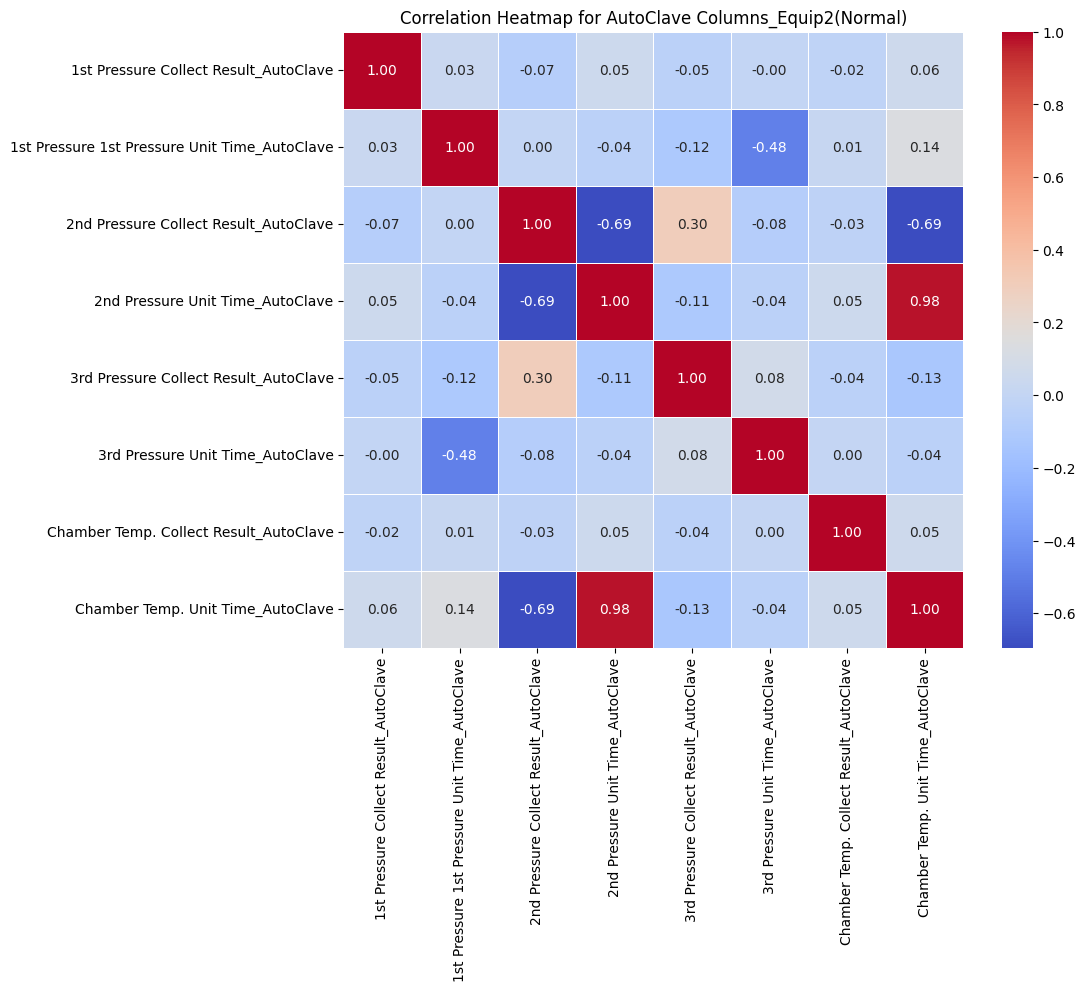

In [39]:
auto_columns = equip2_normal.filter(like = 'AutoClave').copy()
print(len(auto_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = auto_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for AutoClave Columns_Equip2(Normal)')
plt.show()

### Equip2_AbNormal

In [29]:
# target이 'Abnormal'인 행만 필터링
equip2_abnormal = equip2[equip2['target'] == 'AbNormal']

# 필터링된 데이터프레임 크기 확인
print(f"'target'이 'abnormal'인 행의 개수: {len(equip2_abnormal)}")

equip2_abnormal

'target'이 'abnormal'인 행의 개수: 850


CURE SPEED Collect Result_Dam  \
90                               100   
170                               70   
216                               70   
254                               85   
304                               70   
...                              ...   
40302                             70   
40339                             70   
40410                             70   
40438                             70   
40493                             70   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
90                                               16   
170                                              16   
216                                              16   
254                                              16   
304                                              16   
...                                             ...   
40302                                            10   
40339                                            10   
40410                                            10   
40438                                            10   
40493                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
90                                                  14.9     
170                                                 13.2     
216                                                 13.2     
254                                                 14.7     
304                                                 13.2     
...                                                  ...     
40302                                               17.0     
40339                                               21.3     
40410                                               17.0     
40438                                                9.7     
40493                                               21.3     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
90                                                   8.6     
170                                                  6.7     
216                                                  6.7     
254                                                  8.5     
304                                                  6.7     
...                                                  ...     
40302                                                4.9     
40339                                                4.9     
40410                                                5.0     
40438                                                4.9     
40493                                                8.4     

       DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
90                                                  14.7     
170                                                 13.2     
216                                                 13.2     
254                                                 14.7     
304                                                 13.2     
...                                                  ...     
40302                                               17.0     
40339                                               21.3     
40410                                               17.0     
40438                                                9.7     
40493                                               21.3     

       Dispense Volume(Stage1) Collect Result_Dam  \
90                                           1.04   
170                                          0.92   
216                                          0.92   
254                                          1.61   
304                                          0.92   
...                                           ...   
40302                                        1.19   
40339                                        1.49   
40410                                        1.19   
40438                                        0.67   
40493                                        1.

34


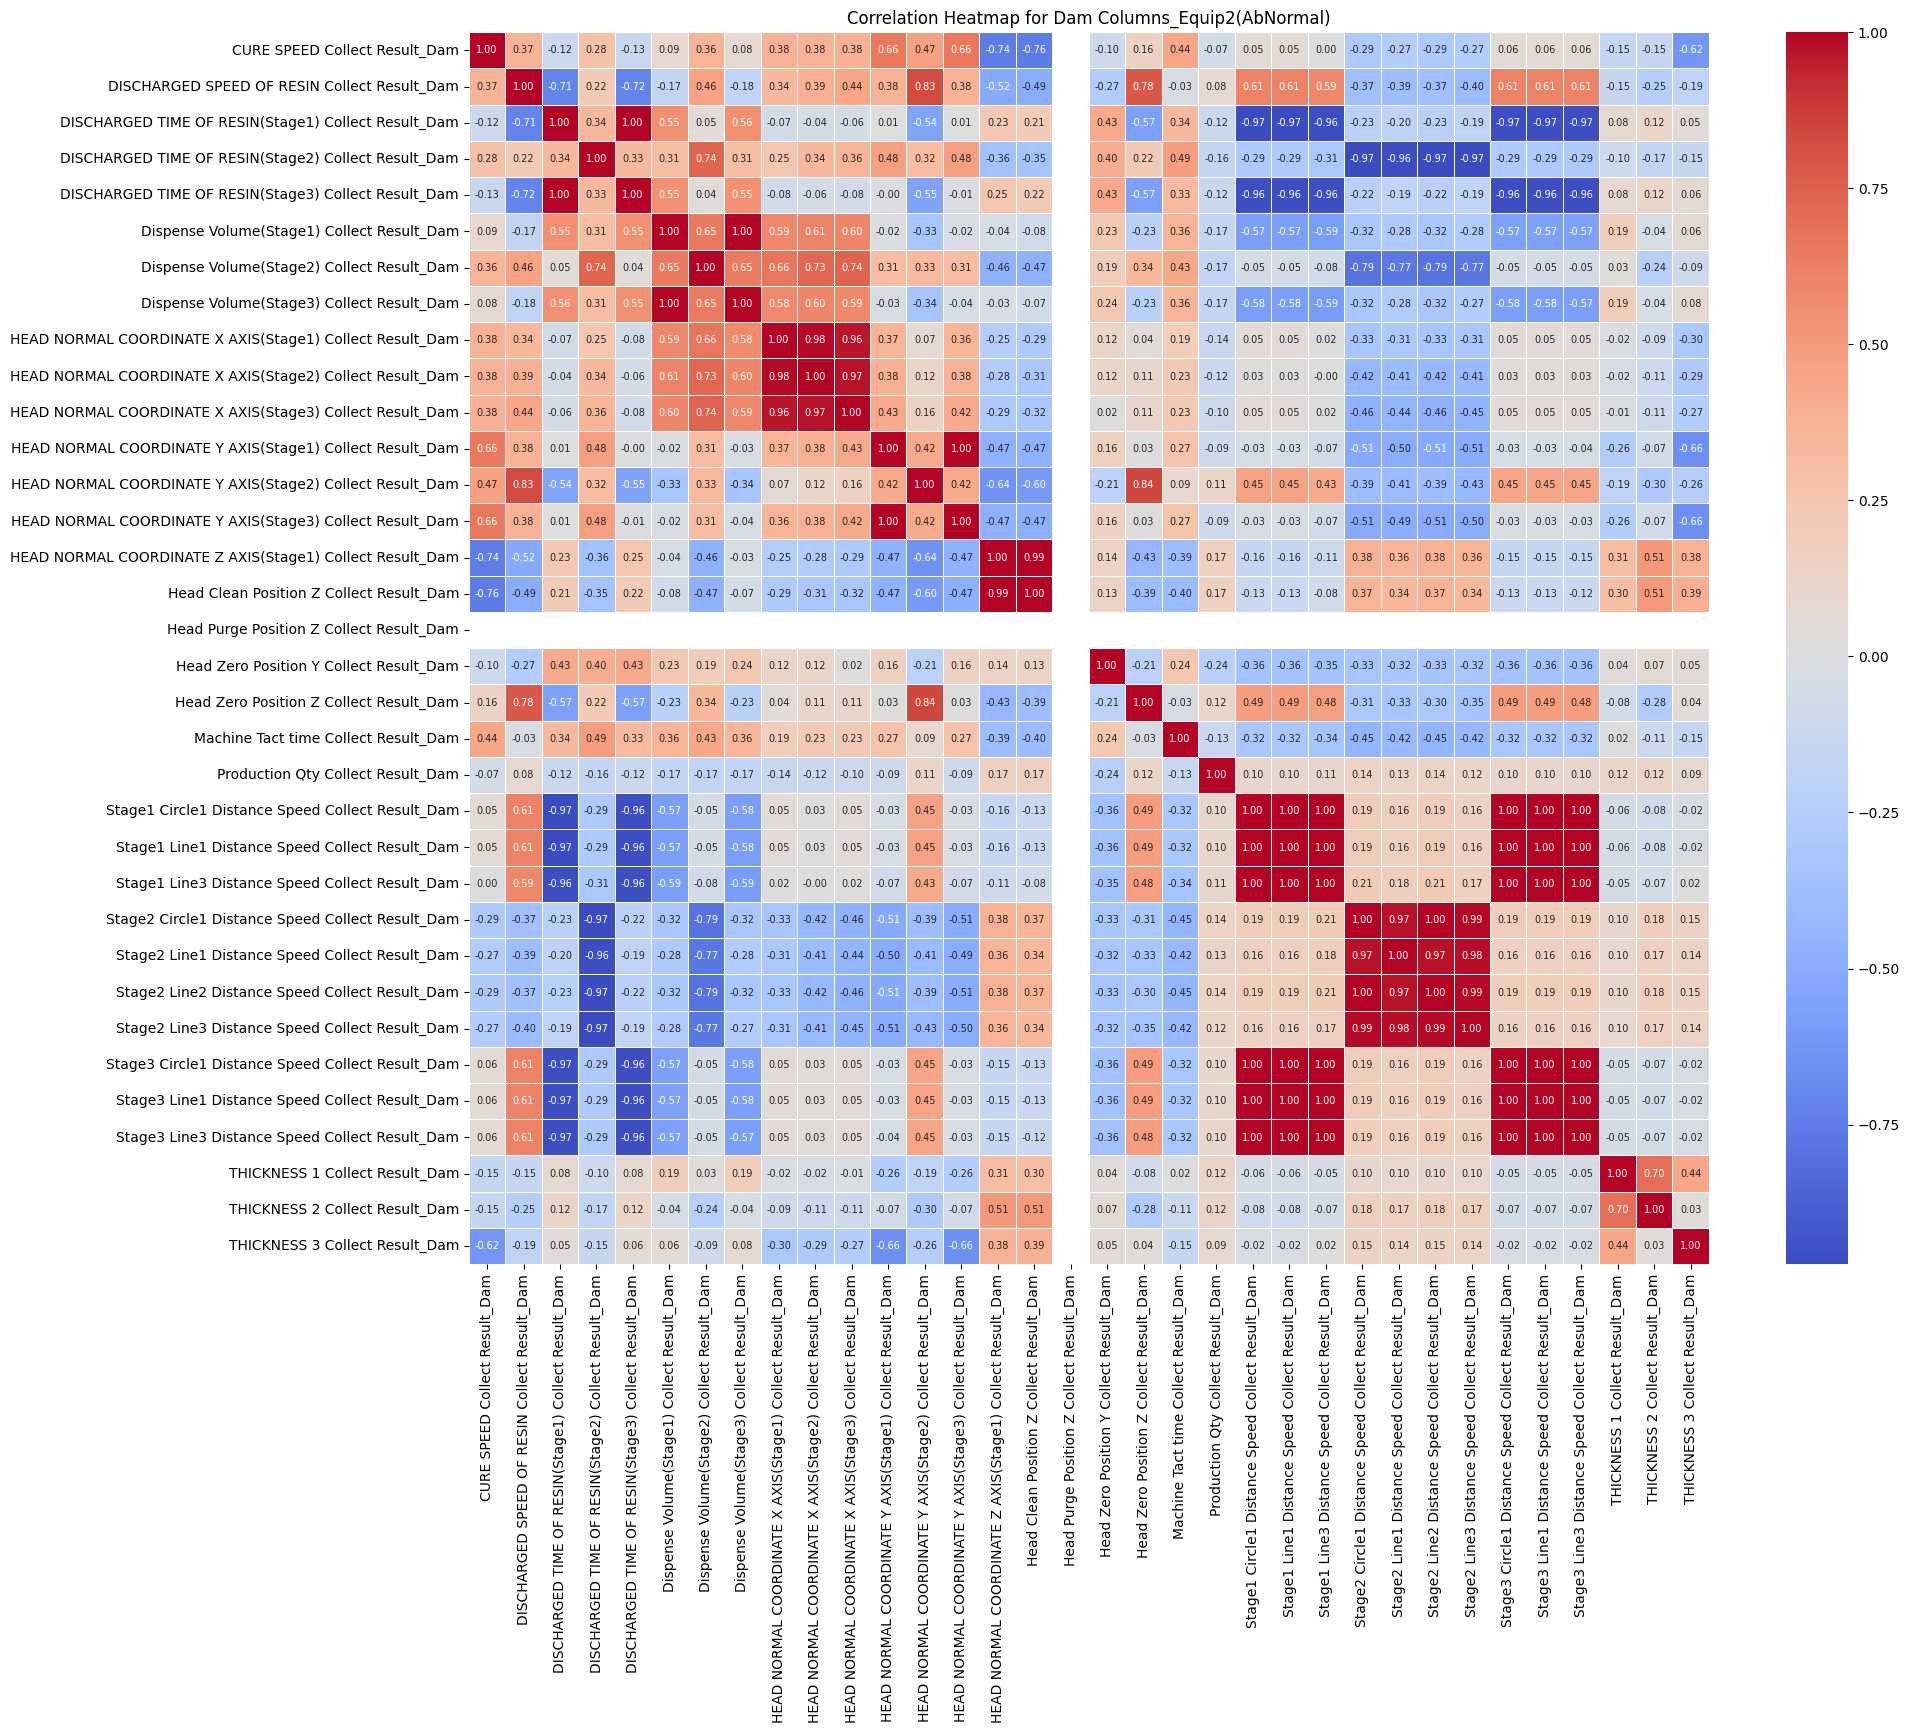

In [30]:
# Dam이라는 이름이 포함된 열들만 필터링하고 복사본 생성
dam_columns = equip2_abnormal.filter(like='Dam').copy()
print(len(dam_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = dam_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Heatmap for Dam Columns_Equip2(AbNormal)')
plt.show()

19


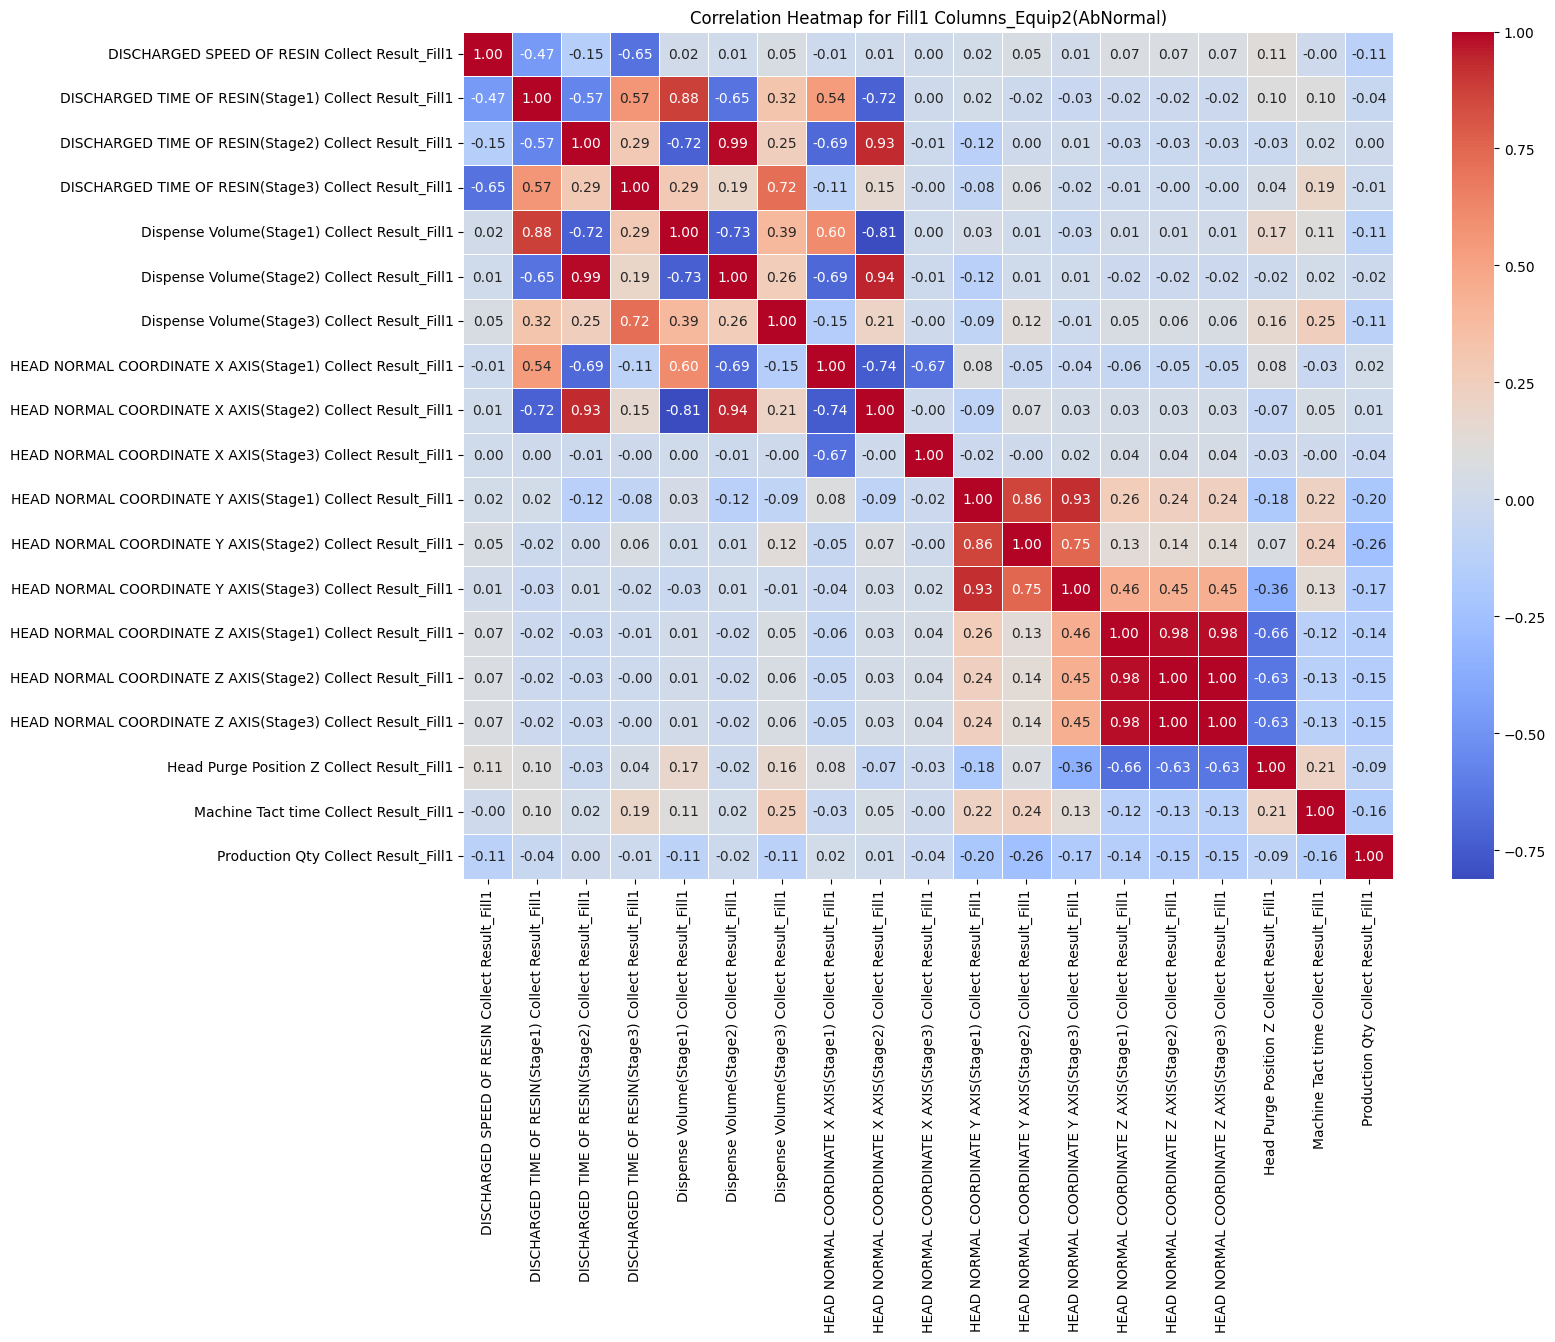

In [33]:
fill1_columns = equip2_abnormal.filter(like='Fill1').copy()
print(len(fill1_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill1_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for Fill1 Columns_Equip2(AbNormal)')
plt.show()

10


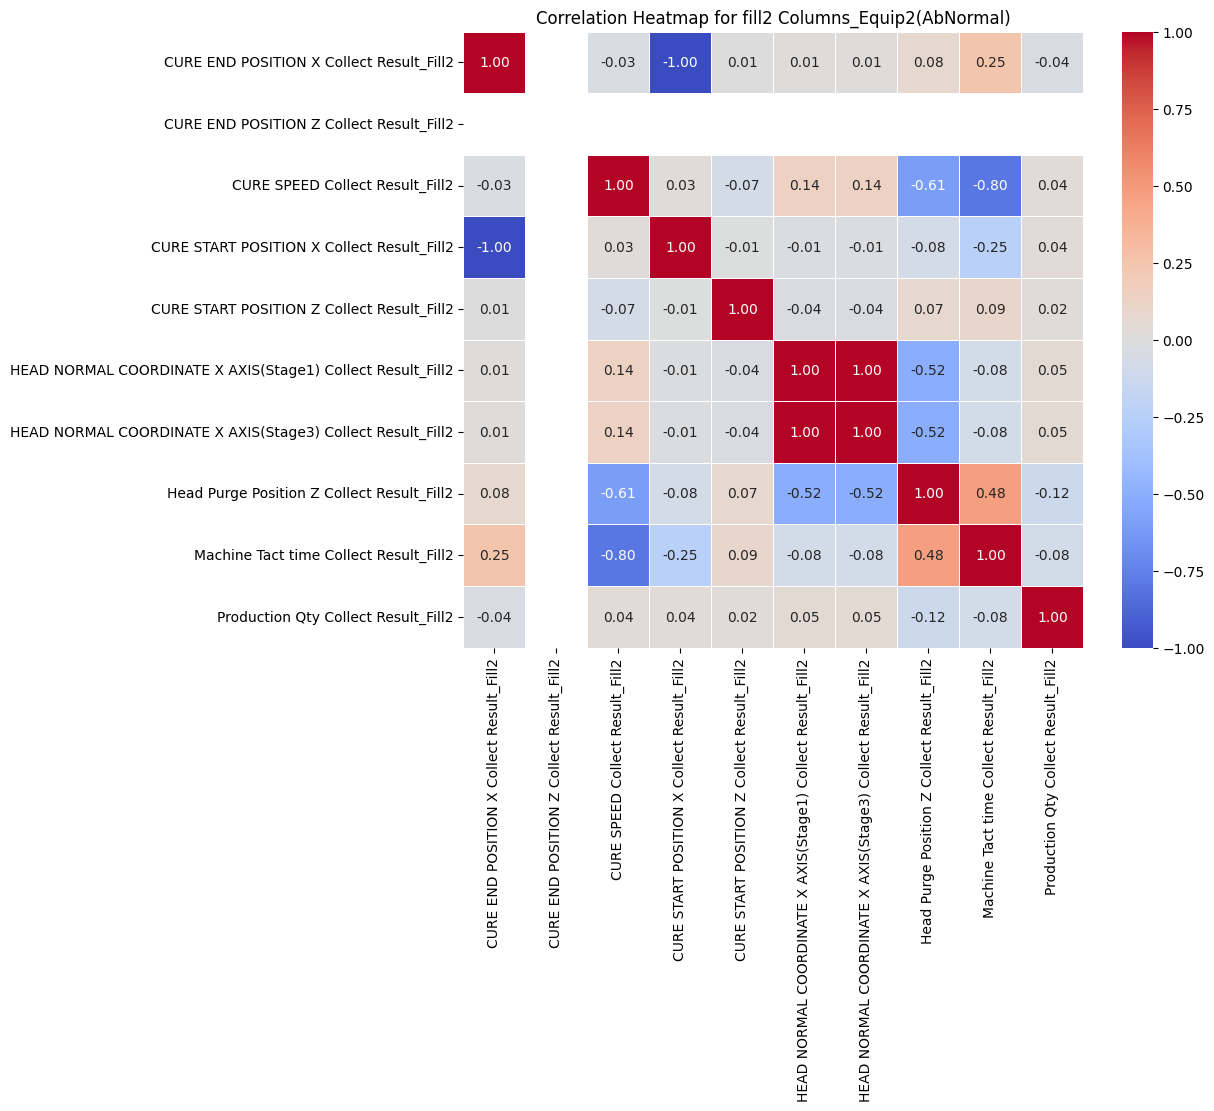

In [37]:
fill2_columns = equip2_abnormal.filter(like = 'Fill2').copy()
print(len(fill2_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill2_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for fill2 Columns_Equip2(AbNormal)')
plt.show()

8


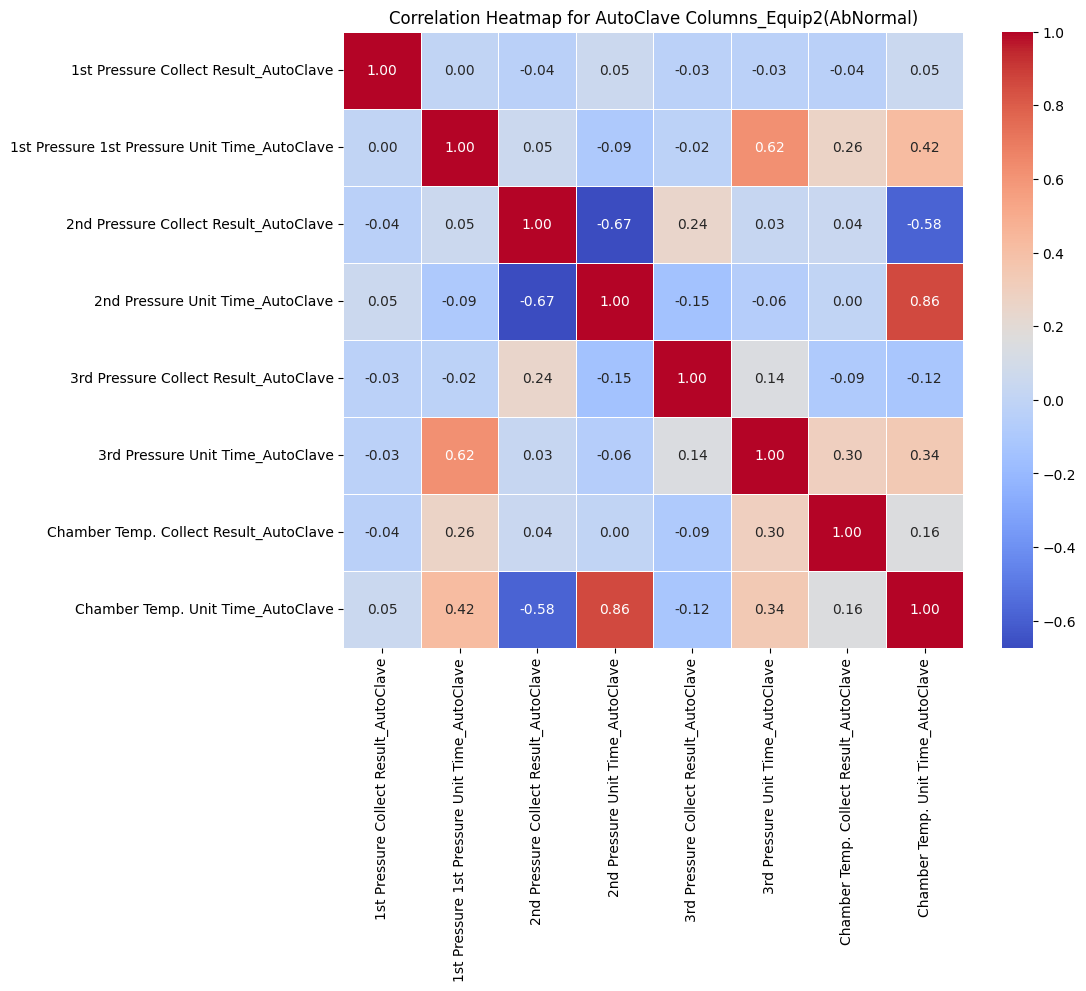

In [40]:
auto_columns = equip2_abnormal.filter(like = 'AutoClave').copy()
print(len(auto_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = auto_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for AutoClave Columns_Equip2(AbNormal)')
plt.show()

In [98]:
equip1= pd.read_csv('./data/equip1.csv')
equip2 = pd.read_csv('./data/equip2.csv')

In [100]:
from itertools import combinations
from collections import defaultdict

# 동일한 값을 가지는 열 쌍을 저장할 리스트
equal_columns = []

# 열 이름들의 모든 쌍을 생성하여 비교
for col1, col2 in combinations(equip1.columns, 2):
    if equip1[col1].equals(equip1[col2]):
        equal_columns.append((col1, col2))

# 열 쌍을 그룹화하여 저장할 딕셔너리
grouped_columns = defaultdict(set)

# 열 쌍을 그룹화
for col1, col2 in equal_columns:
    grouped_columns[col1].add(col2)
    grouped_columns[col2].add(col1)

# 방문한 열을 추적할 집합
visited = set()

# 그룹화된 열 쌍 출력
print("같은 값을 가지는 열 그룹:")
for col, group in grouped_columns.items():
    if col not in visited:
        # 현재 열과 연결된 모든 열을 그룹으로 묶기
        group.add(col)
        visited.update(group)
        print(f"그룹: {', '.join(group)}")

같은 값을 가지는 열 그룹:
그룹: HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1, HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1, HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1
그룹: Receip No Collect Result_Fill1, Receip No Collect Result_Fill2


In [99]:
from itertools import combinations
from collections import defaultdict

# 동일한 값을 가지는 열 쌍을 저장할 리스트
equal_columns = []

# 열 이름들의 모든 쌍을 생성하여 비교
for col1, col2 in combinations(equip2.columns, 2):
    if equip2[col1].equals(equip2[col2]):
        equal_columns.append((col1, col2))

# 열 쌍을 그룹화하여 저장할 딕셔너리
grouped_columns = defaultdict(set)

# 열 쌍을 그룹화
for col1, col2 in equal_columns:
    grouped_columns[col1].add(col2)
    grouped_columns[col2].add(col1)

# 방문한 열을 추적할 집합
visited = set()

# 그룹화된 열 쌍 출력
print("같은 값을 가지는 열 그룹:")
for col, group in grouped_columns.items():
    if col not in visited:
        # 현재 열과 연결된 모든 열을 그룹으로 묶기
        group.add(col)
        visited.update(group)
        print(f"그룹: {', '.join(group)}")

같은 값을 가지는 열 그룹:
그룹: Stage3 Circle1 Distance Speed Collect Result_Dam, Stage3 Line1 Distance Speed Collect Result_Dam
그룹: HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1, HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1
그룹: Receip No Collect Result_Fill1, Receip No Collect Result_Fill2


In [112]:
# 두 열 간에 서로 다른 값을 가지는 행의 수를 계산
col1 = 'Receip No Collect Result_Dam'
col2 = 'Receip No Collect Result_Fill1'

count_different = (equip1[col1] != equip1[col2]).sum()

different_rows = equip1[equip1[col1] != equip1[col2]]
target_values = different_rows['target']

print(f'{col1}과 {col2}의 값이 다른 행의 수: {count_different}')
print(target_values.value_counts())

Receip No Collect Result_Dam과 Receip No Collect Result_Fill1의 값이 다른 행의 수: 1
target
AbNormal    1
Name: count, dtype: int64
